In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd


In [31]:
full_data = pd.read_csv('../data/bretagne.csv')
full_data.head()

,place_id,name,description,is_spending_on_ads,reviews,competitors,website,owner_name,owner_profile_link,featured_image,main_category,categories,rating,workday_timing,closed_on,phone,address,coordinates,review_keywords,link
0,ChIJ-3w89moWEEgR9RFhd5qRzZA,E.Leclerc VANNES,NaN,False,8699.0,Name: E.Leclerc DRIVE Vannes\nlink: https://ww...,https://e.leclerc/mag/e-leclerc-vannes,E.Leclerc VANNES (Owner),https://www.google.com/maps/contrib/1125585989...,https://lh5.googleusercontent.com/p/AF1QipPPm1...,Hypermarket,"Hypermarket, Appliance store, Bakery, Butcher ...",4.2,8:30 am-8 pm,Sunday,+33 2 97 46 60 40,"E.Leclerc VANNES, Zone Commerciale De Parc Lan...","47.6680224,-2.7930742","radius, seafood shop, mass-market retailing, c...",https://www.google.com/maps/place/E.Leclerc+VA...
1,ChIJsYkdMrCdDkgROrml5jOuj00,Marche aux Huitres de Cancale,NaN,False,5998.0,Name: SCEO Huitres SIMON - Marche aux Huitres\...,http://www.marcheauxhuitres-cancale.com/,Marche aux Huitres de Cancale (Owner),https://www.google.com/maps/contrib/1028810342...,https://lh5.googleusercontent.com/p/AF1QipMfkg...,Oyster supplier,"Oyster supplier, Seafood market, Seafood resta...",4.6,9:30 am-5:30 pm,Open All Days,NaN,"Marche aux Huitres de Cancale, 1 Rue des Parcs...","48.6706633,-1.851403","tasting, white wine, beach, shells, dozen, lem...",https://www.google.com/maps/place/March%C3%A9+...
2,ChIJsYkdMrCdDkgROrml5jOuj00,Marche aux Huitres de Cancale,NaN,False,5995.0,Name: SCEO Huitres SIMON - Marche aux Huitres\...,http://www.marcheauxhuitres-cancale.com/,Marche aux Huitres de Cancale (Owner),https://www.google.com/maps/contrib/1028810342...,https://lh5.googleusercontent.com/p/AF1QipMfkg...,Oyster supplier,"Oyster supplier, Seafood market, Seafood resta...",4.6,9:30 am-5:30 pm,Open All Days,NaN,"Marche aux Huitres de Cancale, 1 Rue des Parcs...","48.6706633,-1.851403","tasting, white wine, beach, shells, dozen, lem...",https://www.google.com/maps/place/March%C3%A9+...
3,ChIJh_qVuuYVEEgR5saSLM2ZN9k,E.Leclerc AURAY,NaN,False,4410.0,Name: Lidl\nlink: https://www.google.com/maps/...,https://e.leclerc/mag/e-leclerc-auray,E.Leclerc AURAY (Owner),https://www.google.com/maps/contrib/1080356223...,https://lh5.googleusercontent.com/p/AF1QipOWKr...,Hypermarket,"Hypermarket, Appliance store, Bakery, Butcher ...",4.0,8:45 am-7:45 pm,Sunday,+33 2 97 24 20 93,"E.Leclerc AURAY, Za de Kerbois, 5 Rue Abraham ...","47.6621336,-3.0070544","radius, cafeteria, seafood shop, mass-market r...",https://www.google.com/maps/place/E.Leclerc+AU...
4,ChIJs4u9i5JeEEgRmUJJEm8yewc,E.Leclerc LANESTER,NaN,False,4110.0,Name: E.Leclerc Station Service\nlink: https:/...,https://e.leclerc/mag/e-leclerc-lanester,E.Leclerc LANESTER (Owner),https://www.google.com/maps/contrib/1087191003...,https://lh5.googleusercontent.com/p/AF1QipNKCt...,Hypermarket,"Hypermarket, Appliance store, Bakery, Butcher ...",3.9,8:45 am-7:45 pm,"Wednesday, Sunday",+33 2 97 76 98 76,"E.Leclerc LANESTER, 1 Rue Francois Mauriac, 56...","47.7657459,-3.3490078999999997","radius, seafood shop, allee, cold, regions of ...",https://www.google.com/maps/place/E.Leclerc+LA...


In [32]:
# keep only the columns we need
df = full_data.loc[:, ["name", "competitors", "website", "main_category", "categories", "phone", "address", "coordinates",	"link"]].copy()
df.head()

,name,competitors,website,main_category,categories,phone,address,coordinates,link
0,E.Leclerc VANNES,Name: E.Leclerc DRIVE Vannes\nlink: https://ww...,https://e.leclerc/mag/e-leclerc-vannes,Hypermarket,"Hypermarket, Appliance store, Bakery, Butcher ...",+33 2 97 46 60 40,"E.Leclerc VANNES, Zone Commerciale De Parc Lan...","47.6680224,-2.7930742",https://www.google.com/maps/place/E.Leclerc+VA...
1,Marche aux Huitres de Cancale,Name: SCEO Huitres SIMON - Marche aux Huitres\...,http://www.marcheauxhuitres-cancale.com/,Oyster supplier,"Oyster supplier, Seafood market, Seafood resta...",NaN,"Marche aux Huitres de Cancale, 1 Rue des Parcs...","48.6706633,-1.851403",https://www.google.com/maps/place/March%C3%A9+...
2,Marche aux Huitres de Cancale,Name: SCEO Huitres SIMON - Marche aux Huitres\...,http://www.marcheauxhuitres-cancale.com/,Oyster supplier,"Oyster supplier, Seafood market, Seafood resta...",NaN,"Marche aux Huitres de Cancale, 1 Rue des Parcs...","48.6706633,-1.851403",https://www.google.com/maps/place/March%C3%A9+...
3,E.Leclerc AURAY,Name: Lidl\nlink: https://www.google.com/maps/...,https://e.leclerc/mag/e-leclerc-auray,Hypermarket,"Hypermarket, Appliance store, Bakery, Butcher ...",+33 2 97 24 20 93,"E.Leclerc AURAY, Za de Kerbois, 5 Rue Abraham ...","47.6621336,-3.0070544",https://www.google.com/maps/place/E.Leclerc+AU...
4,E.Leclerc LANESTER,Name: E.Leclerc Station Service\nlink: https:/...,https://e.leclerc/mag/e-leclerc-lanester,Hypermarket,"Hypermarket, Appliance store, Bakery, Butcher ...",+33 2 97 76 98 76,"E.Leclerc LANESTER, 1 Rue Francois Mauriac, 56...","47.7657459,-3.3490078999999997",https://www.google.com/maps/place/E.Leclerc+LA...


In [33]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   place_id            3028 non-null   object 
 1   name                3028 non-null   object 
 2   description         2 non-null      object 
 3   is_spending_on_ads  3028 non-null   bool   
 4   reviews             1954 non-null   float64
 5   competitors         2846 non-null   object 
 6   website             889 non-null    object 
 7   owner_name          3028 non-null   object 
 8   owner_profile_link  1169 non-null   object 
 9   featured_image      2311 non-null   object 
 10  main_category       3026 non-null   object 
 11  categories          3026 non-null   object 
 12  rating              1954 non-null   float64
 13  workday_timing      1018 non-null   object 
 14  closed_on           3028 non-null   object 
 15  phone               2311 non-null   object 
 16  addres

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3028 non-null   object
 1   competitors    2846 non-null   object
 2   website        889 non-null    object
 3   main_category  3026 non-null   object
 4   categories     3026 non-null   object
 5   phone          2311 non-null   object
 6   address        3009 non-null   object
 7   coordinates    3028 non-null   object
 8   link           3028 non-null   object
dtypes: object(9)
memory usage: 213.0+ KB


In [35]:
# Split the coordinates column into latitude and longitude
df[['latitude','longitude']] = df['coordinates'].str.split(',', expand=True)
df.head()

,name,competitors,website,main_category,categories,phone,address,coordinates,link,latitude,longitude
0,E.Leclerc VANNES,Name: E.Leclerc DRIVE Vannes\nlink: https://ww...,https://e.leclerc/mag/e-leclerc-vannes,Hypermarket,"Hypermarket, Appliance store, Bakery, Butcher ...",+33 2 97 46 60 40,"E.Leclerc VANNES, Zone Commerciale De Parc Lan...","47.6680224,-2.7930742",https://www.google.com/maps/place/E.Leclerc+VA...,47.6680224,-2.7930742
1,Marche aux Huitres de Cancale,Name: SCEO Huitres SIMON - Marche aux Huitres\...,http://www.marcheauxhuitres-cancale.com/,Oyster supplier,"Oyster supplier, Seafood market, Seafood resta...",NaN,"Marche aux Huitres de Cancale, 1 Rue des Parcs...","48.6706633,-1.851403",https://www.google.com/maps/place/March%C3%A9+...,48.6706633,-1.851403
2,Marche aux Huitres de Cancale,Name: SCEO Huitres SIMON - Marche aux Huitres\...,http://www.marcheauxhuitres-cancale.com/,Oyster supplier,"Oyster supplier, Seafood market, Seafood resta...",NaN,"Marche aux Huitres de Cancale, 1 Rue des Parcs...","48.6706633,-1.851403",https://www.google.com/maps/place/March%C3%A9+...,48.6706633,-1.851403
3,E.Leclerc AURAY,Name: Lidl\nlink: https://www.google.com/maps/...,https://e.leclerc/mag/e-leclerc-auray,Hypermarket,"Hypermarket, Appliance store, Bakery, Butcher ...",+33 2 97 24 20 93,"E.Leclerc AURAY, Za de Kerbois, 5 Rue Abraham ...","47.6621336,-3.0070544",https://www.google.com/maps/place/E.Leclerc+AU...,47.6621336,-3.0070544
4,E.Leclerc LANESTER,Name: E.Leclerc Station Service\nlink: https:/...,https://e.leclerc/mag/e-leclerc-lanester,Hypermarket,"Hypermarket, Appliance store, Bakery, Butcher ...",+33 2 97 76 98 76,"E.Leclerc LANESTER, 1 Rue Francois Mauriac, 56...","47.7657459,-3.3490078999999997",https://www.google.com/maps/place/E.Leclerc+LA...,47.7657459,-3.3490078999999997


In [36]:
df.main_category.value_counts()

main_category
Cattle farm                         679
Farm                                366
Pig farm                            365
Livestock breeder                   274
Poultry farm                        219
                                   ... 
Research and product development      1
Machining manufacturer                1
Clothes and fabric manufacturer       1
Industrial engineer                   1
Fitness equipment wholesaler          1
Name: count, Length: 97, dtype: int64

In [37]:
# remove rows with null coordinates and duplicates
df = df.dropna(subset=['coordinates'])
df = df.drop_duplicates(subset=['coordinates'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1902 entries, 0 to 3027
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           1902 non-null   object
 1   competitors    1801 non-null   object
 2   website        522 non-null    object
 3   main_category  1900 non-null   object
 4   categories     1900 non-null   object
 5   phone          1486 non-null   object
 6   address        1893 non-null   object
 7   coordinates    1902 non-null   object
 8   link           1902 non-null   object
 9   latitude       1902 non-null   object
 10  longitude      1902 non-null   object
dtypes: object(11)
memory usage: 178.3+ KB


In [39]:
# translate values to english
translations = {
            'Farm': 'farm',
            'Dairy farm': 'dairy_farm',
            'Poultry farm': 'poultry_farm',
            'Organic farm': 'organic_farm',
            'Cattle breeder': 'cattle_breeder',
            "Cattle farm" : "cattle_farm",
            'Livestock farm': 'livestock_farm',
            'Pig farm': 'pig_farm',
            'Fish farm': 'fish_farm',
            'Aquaculture farm': 'aquaculture_farm',
            'Egg farmer': 'egg_farmer',
            'Shrimp farm': 'shrimp_farm',
            'Farmer': 'farmer',
            "Dairy" : "dairy",
            "Livestock breeder": "livestock_breeder",
            "Meat Producer": "meat_producer",
        }

# Translate main categories
translated_df = df.copy()  # Create a copy of the original DataFrame
translated_df['main_category'] = translated_df['main_category'].map(translations).fillna(translated_df['main_category'])
translated_df['main_category'].value_counts()


main_category
cattle_farm                         341
farm                                289
pig_farm                            259
livestock_breeder                   229
poultry_farm                        126
                                   ... 
Marketing consultant                  1
Chamber of agriculture                1
Holiday home                          1
Research and product development      1
Hotel                                 1
Name: count, Length: 95, dtype: int64

In [40]:
translated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1902 entries, 0 to 3027
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           1902 non-null   object
 1   competitors    1801 non-null   object
 2   website        522 non-null    object
 3   main_category  1900 non-null   object
 4   categories     1900 non-null   object
 5   phone          1486 non-null   object
 6   address        1893 non-null   object
 7   coordinates    1902 non-null   object
 8   link           1902 non-null   object
 9   latitude       1902 non-null   object
 10  longitude      1902 non-null   object
dtypes: object(11)
memory usage: 178.3+ KB


In [41]:
translated_df.head()

,name,competitors,website,main_category,categories,phone,address,coordinates,link,latitude,longitude
0,E.Leclerc VANNES,Name: E.Leclerc DRIVE Vannes\nlink: https://ww...,https://e.leclerc/mag/e-leclerc-vannes,Hypermarket,"Hypermarket, Appliance store, Bakery, Butcher ...",+33 2 97 46 60 40,"E.Leclerc VANNES, Zone Commerciale De Parc Lan...","47.6680224,-2.7930742",https://www.google.com/maps/place/E.Leclerc+VA...,47.6680224,-2.7930742
1,Marche aux Huitres de Cancale,Name: SCEO Huitres SIMON - Marche aux Huitres\...,http://www.marcheauxhuitres-cancale.com/,Oyster supplier,"Oyster supplier, Seafood market, Seafood resta...",NaN,"Marche aux Huitres de Cancale, 1 Rue des Parcs...","48.6706633,-1.851403",https://www.google.com/maps/place/March%C3%A9+...,48.6706633,-1.851403
3,E.Leclerc AURAY,Name: Lidl\nlink: https://www.google.com/maps/...,https://e.leclerc/mag/e-leclerc-auray,Hypermarket,"Hypermarket, Appliance store, Bakery, Butcher ...",+33 2 97 24 20 93,"E.Leclerc AURAY, Za de Kerbois, 5 Rue Abraham ...","47.6621336,-3.0070544",https://www.google.com/maps/place/E.Leclerc+AU...,47.6621336,-3.0070544
4,E.Leclerc LANESTER,Name: E.Leclerc Station Service\nlink: https:/...,https://e.leclerc/mag/e-leclerc-lanester,Hypermarket,"Hypermarket, Appliance store, Bakery, Butcher ...",+33 2 97 76 98 76,"E.Leclerc LANESTER, 1 Rue Francois Mauriac, 56...","47.7657459,-3.3490078999999997",https://www.google.com/maps/place/E.Leclerc+LA...,47.7657459,-3.3490078999999997
5,E.Leclerc PLOERMEL,Name: Intermarche SUPER Ploermel\nlink: https:...,https://e.leclerc/mag/e-leclerc-ploermel,Hypermarket,"Hypermarket, Appliance store, Bakery, Butcher ...",+33 2 97 74 23 10,"E.Leclerc PLOERMEL, 13 Rue du Lac, 56800 Ploer...","47.9382321,-2.4057075",https://www.google.com/maps/place/E.Leclerc+PL...,47.9382321,-2.4057075


In [42]:
#print(df["categories"][2])

In [43]:

translated_df_2 = translated_df.copy()
def translate_categories(category_list):
    translated_list = []
    if isinstance(category_list, float) and np.isnan(category_list):
        return translated_list
    
    for category in category_list.split(", "):
        if category in translations:
            translated_list.append(translations[category])
        else:
            translated_list.append(category)
    return translated_list
translated_df_2['categories'] = translated_df['categories'].apply(translate_categories)

  

In [44]:
translated_df_2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1902 entries, 0 to 3027
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           1902 non-null   object
 1   competitors    1801 non-null   object
 2   website        522 non-null    object
 3   main_category  1900 non-null   object
 4   categories     1902 non-null   object
 5   phone          1486 non-null   object
 6   address        1893 non-null   object
 7   coordinates    1902 non-null   object
 8   link           1902 non-null   object
 9   latitude       1902 non-null   object
 10  longitude      1902 non-null   object
dtypes: object(11)
memory usage: 178.3+ KB


In [45]:

keywords = {
    'dairy_farm',
    'poultry_farm',
    'cattle_breeder',
    "cattle_farm",
    'livestock_farm',
    'pig_farm',
    'fish_farm',
    'aquaculture_farm',
    'egg_farmer',
    'shrimp_farm',
    "dairy",
    "livestock_breeder",
    "meat_producer",
}
    
# Filter rows based on main_category column
#translated_df_2 = translated_df_2[self.df['main_category'].isin(keywords1)]
def check_keywords(category_list):
    if isinstance(category_list, float) and np.isnan(category_list):
        pass
    for category in category_list:
        if category in keywords:
            return True
    return False
translated_df_2['contains_keyword'] = translated_df_2['categories'].apply(check_keywords)
translated_df_2 = translated_df_2[translated_df_2['contains_keyword']]
# the inverse or the previous line
#translated_df_3 = translated_df_2[~translated_df_2['contains_keyword']]
translated_df_2.drop(columns=['contains_keyword'], inplace=True)


In [46]:
translated_df_2['main_category'].value_counts()

main_category
cattle_farm                         341
pig_farm                            259
farm                                252
livestock_breeder                   229
poultry_farm                        126
dairy_farm                           88
aquaculture_farm                     51
fish_farm                            44
Crop grower                          24
organic_farm                         21
Hypermarket                          10
Supermarket                          10
Farm shop                             8
Oyster supplier                       6
Butcher shop deli                     5
dairy                                 3
Farmers' market                       3
Cheese shop                           3
Seafood market                        2
Seafood farm                          2
Horse riding school                   2
Slaughterhouse                        2
Store                                 2
Stable                                2
Cheese manufacturer       

In [47]:
def filter_categories(category_list):
    if isinstance(category_list, float) and np.isnan(category_list):
        return []
    return [category for category in category_list if category in keywords]

translated_df_2['categories'] = translated_df_2['categories'].apply(filter_categories)


In [48]:
translated_df_2.head()

,name,competitors,website,main_category,categories,phone,address,coordinates,link,latitude,longitude
0,E.Leclerc VANNES,Name: E.Leclerc DRIVE Vannes\nlink: https://ww...,https://e.leclerc/mag/e-leclerc-vannes,Hypermarket,[dairy],+33 2 97 46 60 40,"E.Leclerc VANNES, Zone Commerciale De Parc Lan...","47.6680224,-2.7930742",https://www.google.com/maps/place/E.Leclerc+VA...,47.6680224,-2.7930742
3,E.Leclerc AURAY,Name: Lidl\nlink: https://www.google.com/maps/...,https://e.leclerc/mag/e-leclerc-auray,Hypermarket,[dairy],+33 2 97 24 20 93,"E.Leclerc AURAY, Za de Kerbois, 5 Rue Abraham ...","47.6621336,-3.0070544",https://www.google.com/maps/place/E.Leclerc+AU...,47.6621336,-3.0070544
4,E.Leclerc LANESTER,Name: E.Leclerc Station Service\nlink: https:/...,https://e.leclerc/mag/e-leclerc-lanester,Hypermarket,[dairy],+33 2 97 76 98 76,"E.Leclerc LANESTER, 1 Rue Francois Mauriac, 56...","47.7657459,-3.3490078999999997",https://www.google.com/maps/place/E.Leclerc+LA...,47.7657459,-3.3490078999999997
5,E.Leclerc PLOERMEL,Name: Intermarche SUPER Ploermel\nlink: https:...,https://e.leclerc/mag/e-leclerc-ploermel,Hypermarket,[dairy],+33 2 97 74 23 10,"E.Leclerc PLOERMEL, 13 Rue du Lac, 56800 Ploer...","47.9382321,-2.4057075",https://www.google.com/maps/place/E.Leclerc+PL...,47.9382321,-2.4057075
6,E.Leclerc HENNEBONT CEDEX,Name: E.Leclerc DRIVE Hennebont\nlink: https:/...,https://e.leclerc/mag/e-leclerc-hennebont,Supermarket,[dairy],+33 2 97 36 26 26,"E.Leclerc HENNEBONT CEDEX, Zone de la Gardelou...","47.798159899999995,-3.2591004999999997",https://www.google.com/maps/place/E.Leclerc+HE...,47.798159899999995,-3.2591004999999997


In [49]:
translated_df_2.categories.value_counts()

categories
[livestock_breeder]                        397
[pig_farm]                                 370
[cattle_farm]                              345
[poultry_farm]                             139
[dairy_farm]                                95
[aquaculture_farm]                          54
[fish_farm]                                 51
[dairy]                                     27
[livestock_breeder, pig_farm]                9
[cattle_farm, livestock_breeder]             4
[dairy_farm, livestock_breeder]              3
[cattle_farm, pig_farm]                      3
[dairy, dairy_farm, livestock_breeder]       2
[dairy, dairy_farm]                          2
[cattle_farm, dairy_farm, poultry_farm]      2
[dairy_farm, pig_farm]                       1
[livestock_breeder, dairy]                   1
[dairy, pig_farm]                            1
[dairy_farm, pig_farm, poultry_farm]         1
[fish_farm, cattle_farm]                     1
[cattle_farm, pig_farm, poultry_farm]        1
[c

In [50]:
keywords2 = {
    'dairy_farm',
    'poultry_farm',
    'cattle_breeder',
    "cattle_farm",
    'pig_farm',
    'fish_farm',
    'aquaculture_farm',
    'egg_farmer',
    'shrimp_farm',
    "dairy",
}


def update_main_category(row):
    if row['main_category'] not in keywords2:
        if len(row['categories']) == 1:
            if row['categories'][0] in keywords2:
                return row['categories'][0]
            else:
                return "multiple"
        else:
            return "multiple"
    return row['main_category']

translated_df_2['main_category'] = translated_df_2.apply(update_main_category, axis=1)
translated_df_2['main_category'].value_counts()

main_category
multiple            420
pig_farm            370
cattle_farm         349
poultry_farm        139
dairy_farm           98
aquaculture_farm     55
fish_farm            52
dairy                30
Name: count, dtype: int64

In [51]:
def get_animal_type(row):
    category_to_animal = {
    'dairy_farm' : 'cows',
    'poultry_farm' : 'poultry',
    'cattle_breeder' : 'cows',
    "cattle_farm" : "cows",
    'livestock_farm' : 'other',
    'pig_farm' : 'pigs',
    'fish_farm' : 'fish',
    'aquaculture_farm' : 'fish',
    'egg_farmer' : 'chickens',
    'shrimp_farm' : 'fish',
    "dairy" : "cows",
    "livestock_breeder" : "other",
    "meat_producer" : "other",
}
    return category_to_animal.get(row['main_category'], 'other')


In [52]:
translated_df_2['animal_type'] = translated_df_2.apply(get_animal_type, axis=1)
translated_df_2['animal_type'].value_counts()

animal_type
cows       477
other      420
pigs       370
poultry    139
fish       107
Name: count, dtype: int64

In [53]:
translated_df_2.head()

,name,competitors,website,main_category,categories,phone,address,coordinates,link,latitude,longitude,animal_type
0,E.Leclerc VANNES,Name: E.Leclerc DRIVE Vannes\nlink: https://ww...,https://e.leclerc/mag/e-leclerc-vannes,dairy,[dairy],+33 2 97 46 60 40,"E.Leclerc VANNES, Zone Commerciale De Parc Lan...","47.6680224,-2.7930742",https://www.google.com/maps/place/E.Leclerc+VA...,47.6680224,-2.7930742,cows
3,E.Leclerc AURAY,Name: Lidl\nlink: https://www.google.com/maps/...,https://e.leclerc/mag/e-leclerc-auray,dairy,[dairy],+33 2 97 24 20 93,"E.Leclerc AURAY, Za de Kerbois, 5 Rue Abraham ...","47.6621336,-3.0070544",https://www.google.com/maps/place/E.Leclerc+AU...,47.6621336,-3.0070544,cows
4,E.Leclerc LANESTER,Name: E.Leclerc Station Service\nlink: https:/...,https://e.leclerc/mag/e-leclerc-lanester,dairy,[dairy],+33 2 97 76 98 76,"E.Leclerc LANESTER, 1 Rue Francois Mauriac, 56...","47.7657459,-3.3490078999999997",https://www.google.com/maps/place/E.Leclerc+LA...,47.7657459,-3.3490078999999997,cows
5,E.Leclerc PLOERMEL,Name: Intermarche SUPER Ploermel\nlink: https:...,https://e.leclerc/mag/e-leclerc-ploermel,dairy,[dairy],+33 2 97 74 23 10,"E.Leclerc PLOERMEL, 13 Rue du Lac, 56800 Ploer...","47.9382321,-2.4057075",https://www.google.com/maps/place/E.Leclerc+PL...,47.9382321,-2.4057075,cows
6,E.Leclerc HENNEBONT CEDEX,Name: E.Leclerc DRIVE Hennebont\nlink: https:/...,https://e.leclerc/mag/e-leclerc-hennebont,dairy,[dairy],+33 2 97 36 26 26,"E.Leclerc HENNEBONT CEDEX, Zone de la Gardelou...","47.798159899999995,-3.2591004999999997",https://www.google.com/maps/place/E.Leclerc+HE...,47.798159899999995,-3.2591004999999997,cows


In [54]:
# Convert the DataFrame to a GeoDataFrame
facilities = gpd.GeoDataFrame(translated_df_2, geometry=gpd.points_from_xy(translated_df_2.longitude, translated_df_2.latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
facilities.crs = {'init': 'epsg:4326'}

# View the first five rows of the GeoDataFrame
facilities.head()

/Users/rodrigoazevedo/repos/geopandas/.venv/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,name,competitors,website,main_category,categories,phone,address,coordinates,link,latitude,longitude,animal_type,geometry
0,E.Leclerc VANNES,Name: E.Leclerc DRIVE Vannes\nlink: https://ww...,https://e.leclerc/mag/e-leclerc-vannes,dairy,[dairy],+33 2 97 46 60 40,"E.Leclerc VANNES, Zone Commerciale De Parc Lan...","47.6680224,-2.7930742",https://www.google.com/maps/place/E.Leclerc+VA...,47.6680224,-2.7930742,cows,POINT (-2.79307 47.66802)
3,E.Leclerc AURAY,Name: Lidl\nlink: https://www.google.com/maps/...,https://e.leclerc/mag/e-leclerc-auray,dairy,[dairy],+33 2 97 24 20 93,"E.Leclerc AURAY, Za de Kerbois, 5 Rue Abraham ...","47.6621336,-3.0070544",https://www.google.com/maps/place/E.Leclerc+AU...,47.6621336,-3.0070544,cows,POINT (-3.00705 47.66213)
4,E.Leclerc LANESTER,Name: E.Leclerc Station Service\nlink: https:/...,https://e.leclerc/mag/e-leclerc-lanester,dairy,[dairy],+33 2 97 76 98 76,"E.Leclerc LANESTER, 1 Rue Francois Mauriac, 56...","47.7657459,-3.3490078999999997",https://www.google.com/maps/place/E.Leclerc+LA...,47.7657459,-3.3490078999999997,cows,POINT (-3.34901 47.76575)
5,E.Leclerc PLOERMEL,Name: Intermarche SUPER Ploermel\nlink: https:...,https://e.leclerc/mag/e-leclerc-ploermel,dairy,[dairy],+33 2 97 74 23 10,"E.Leclerc PLOERMEL, 13 Rue du Lac, 56800 Ploer...","47.9382321,-2.4057075",https://www.google.com/maps/place/E.Leclerc+PL...,47.9382321,-2.4057075,cows,POINT (-2.40571 47.93823)
6,E.Leclerc HENNEBONT CEDEX,Name: E.Leclerc DRIVE Hennebont\nlink: https:/...,https://e.leclerc/mag/e-leclerc-hennebont,dairy,[dairy],+33 2 97 36 26 26,"E.Leclerc HENNEBONT CEDEX, Zone de la Gardelou...","47.798159899999995,-3.2591004999999997",https://www.google.com/maps/place/E.Leclerc+HE...,47.798159899999995,-3.2591004999999997,cows,POINT (-3.25910 47.79816)


In [55]:
# reset index
facilities = facilities.reset_index(drop=True)
facilities.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           1513 non-null   object  
 1   competitors    1436 non-null   object  
 2   website        263 non-null    object  
 3   main_category  1513 non-null   object  
 4   categories     1513 non-null   object  
 5   phone          1128 non-null   object  
 6   address        1510 non-null   object  
 7   coordinates    1513 non-null   object  
 8   link           1513 non-null   object  
 9   latitude       1513 non-null   object  
 10  longitude      1513 non-null   object  
 11  animal_type    1513 non-null   object  
 12  geometry       1513 non-null   geometry
dtypes: geometry(1), object(12)
memory usage: 153.8+ KB


<Axes: >

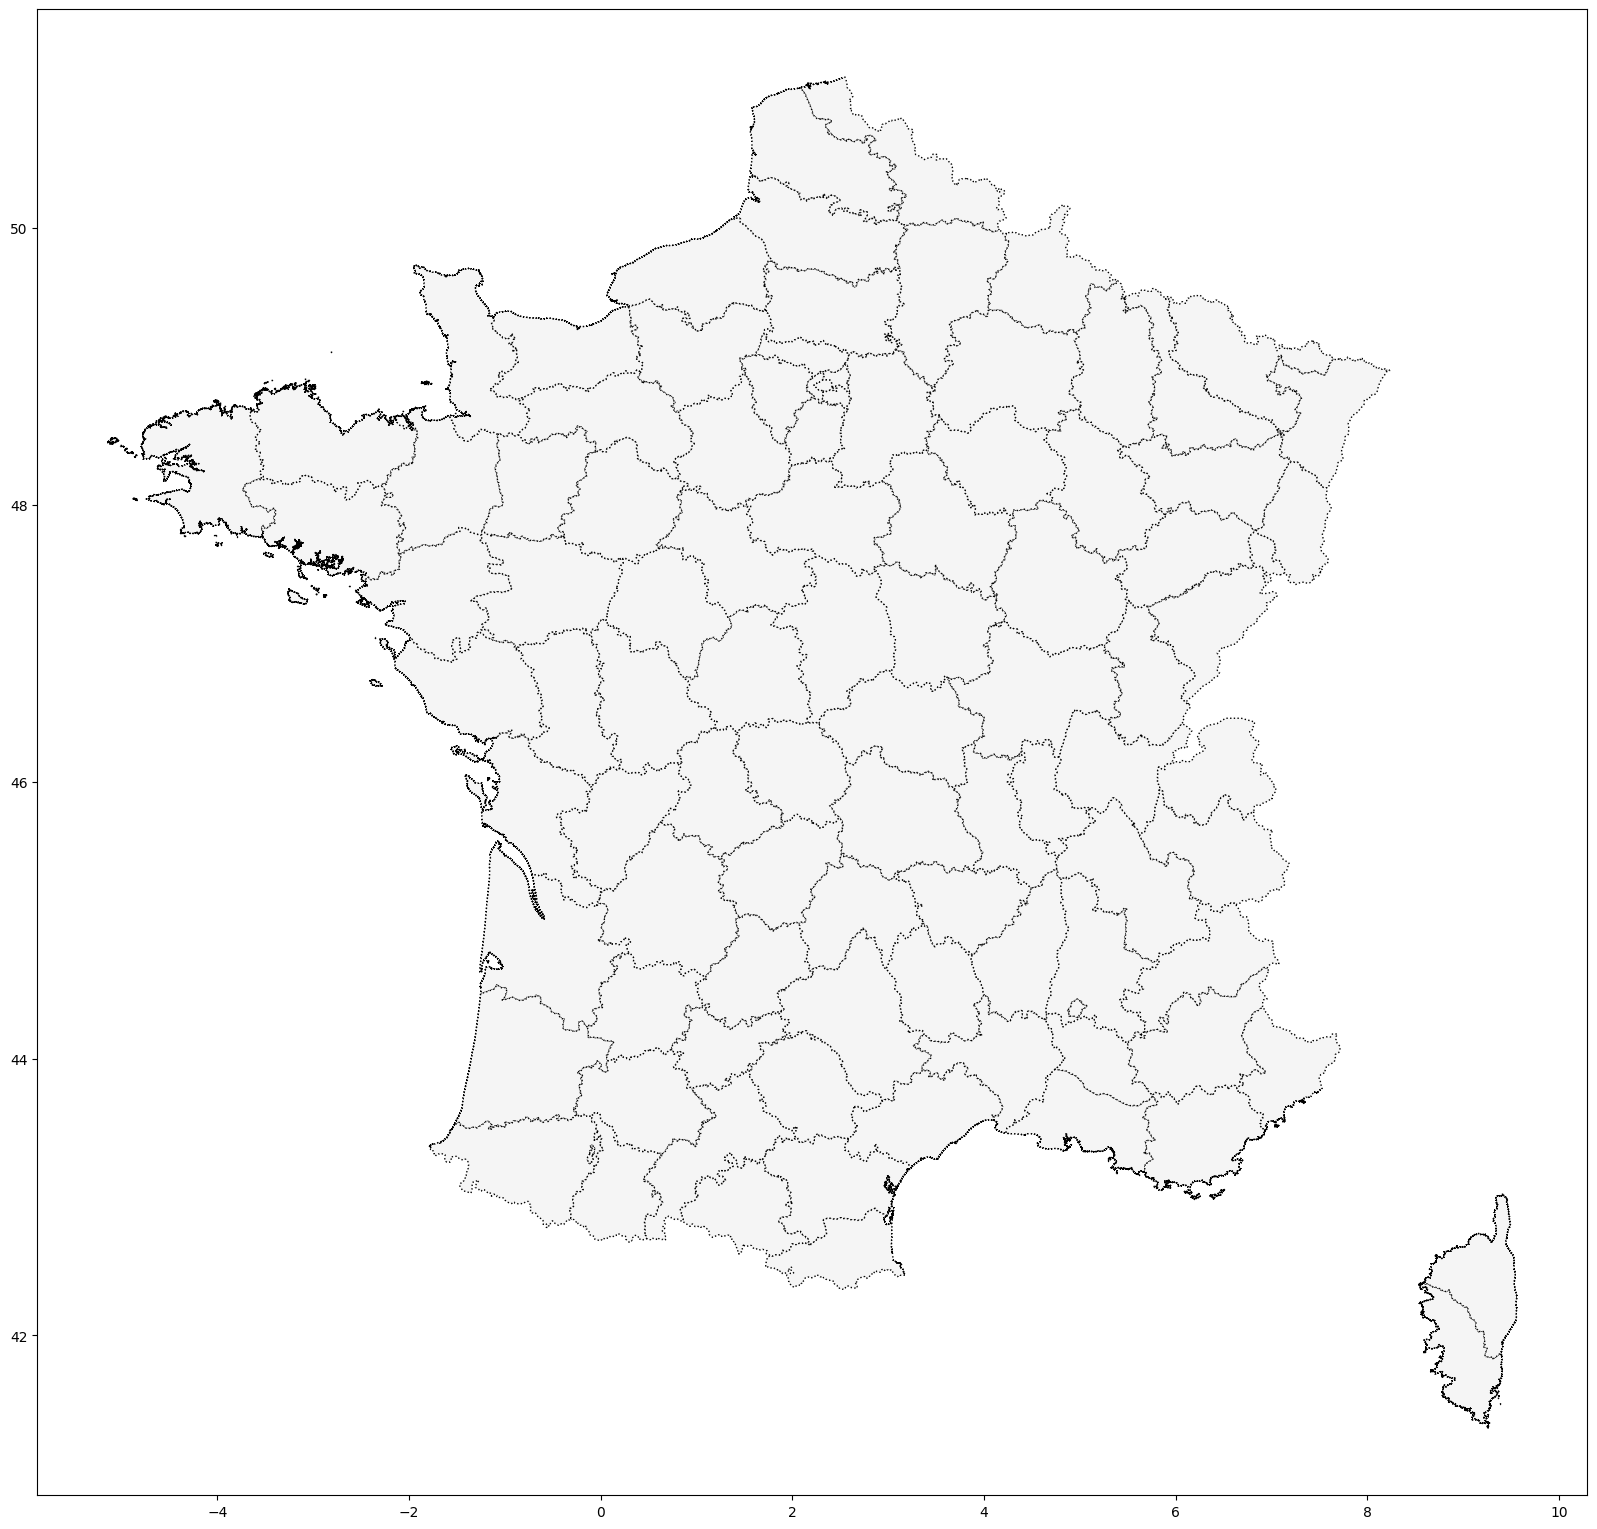

In [56]:
# Load a GeoDataFrame containing departments in France
regions_level2 = gpd.read_file("../france_boundary/gadm36_FRA_2.shp")
regions_level2.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black')

In [57]:
regions_level2[regions_level2['NAME_1'] == 'Pays de la Loire']['NAME_2'].value_counts()


NAME_2
Loire-Atlantique    1
Maine-et-Loire      1
Mayenne             1
Sarthe              1
Vendée              1
Name: count, dtype: int64

<Axes: >

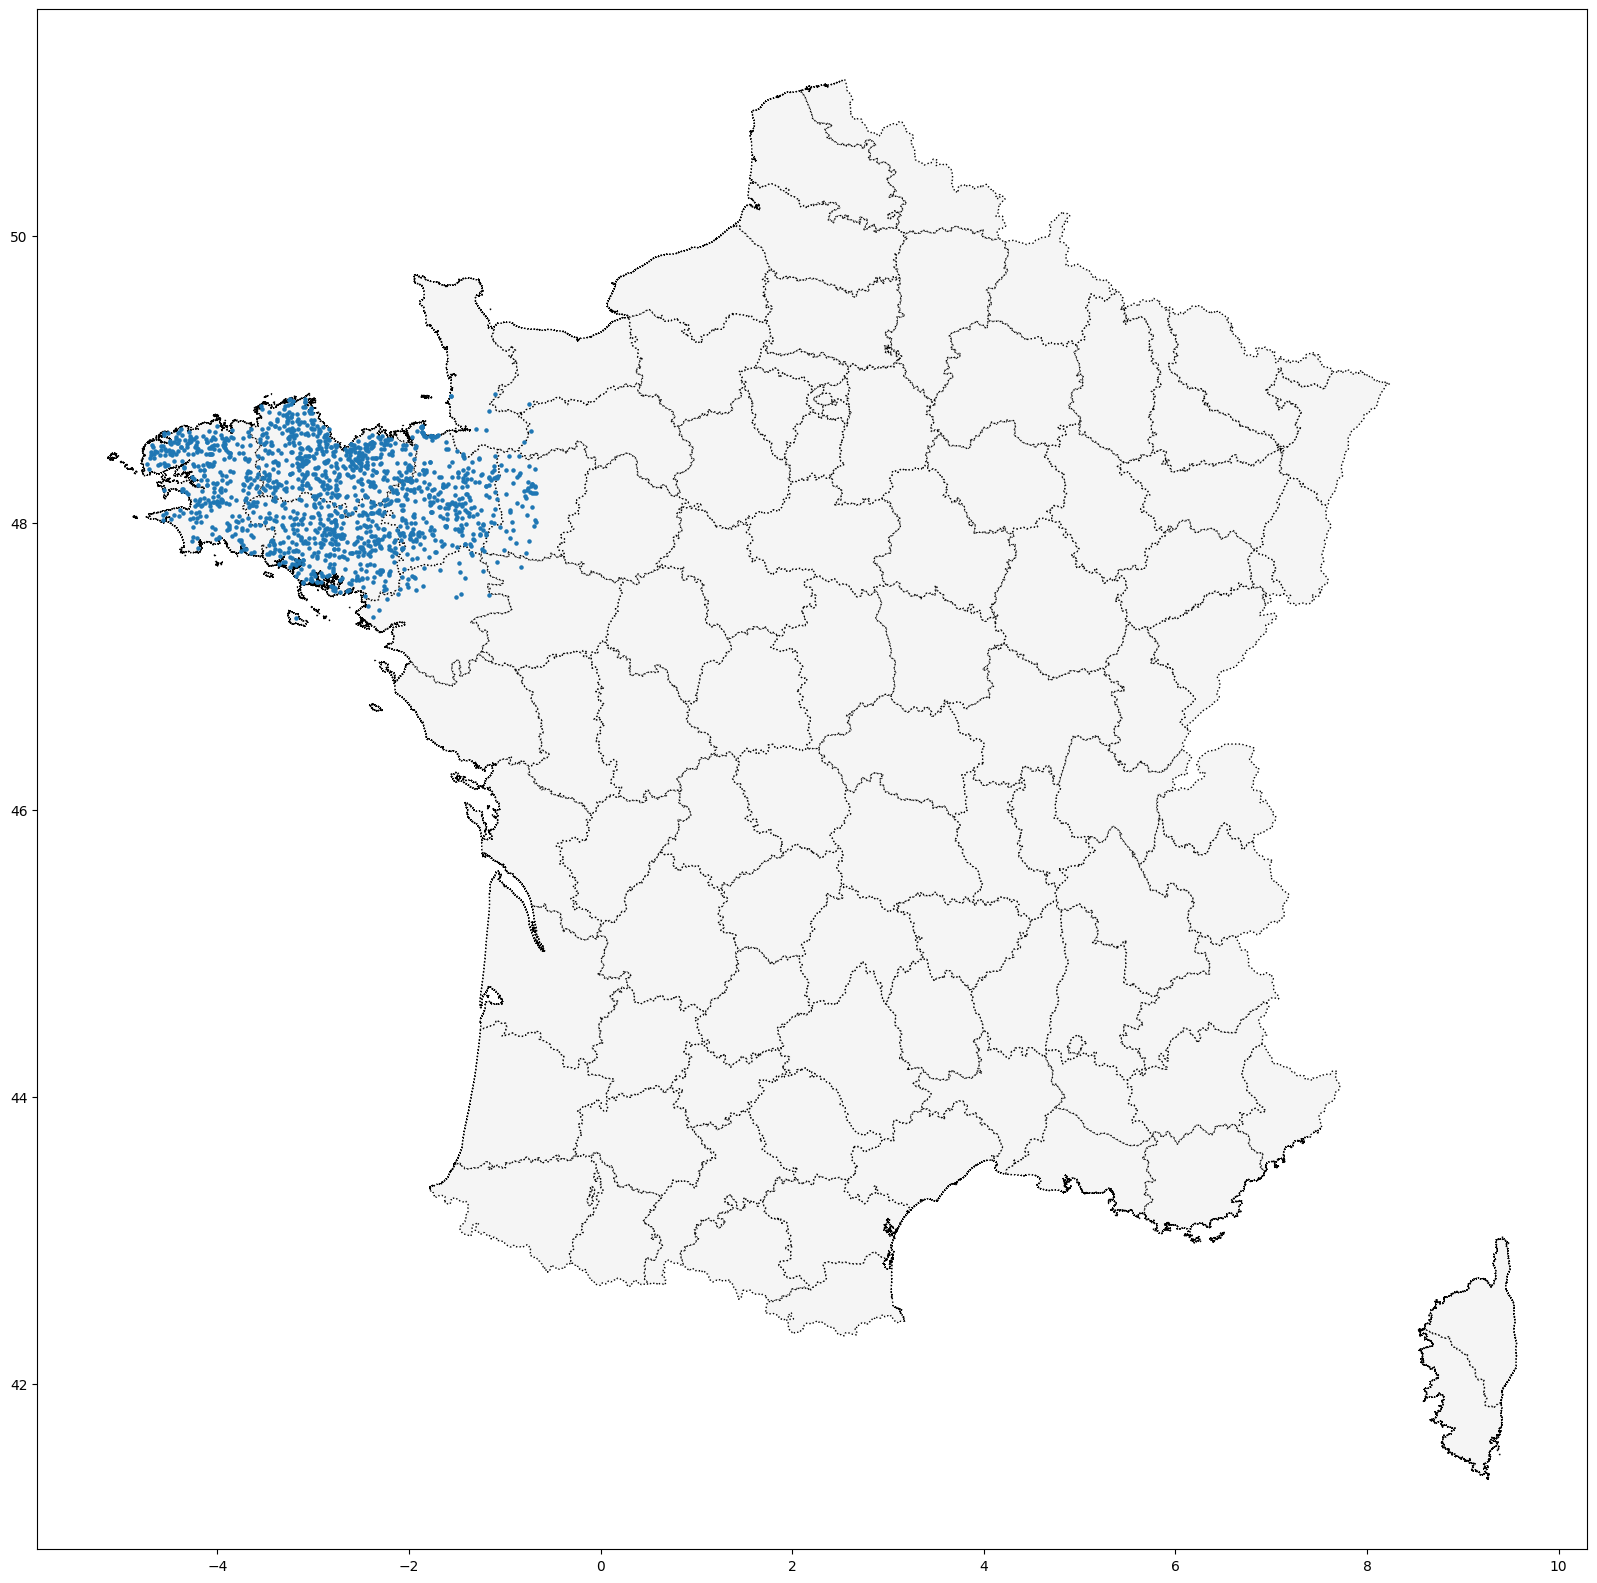

In [58]:
# Create a map
ax = regions_level2.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black')
facilities.plot(markersize=5, ax=ax)

<Axes: >

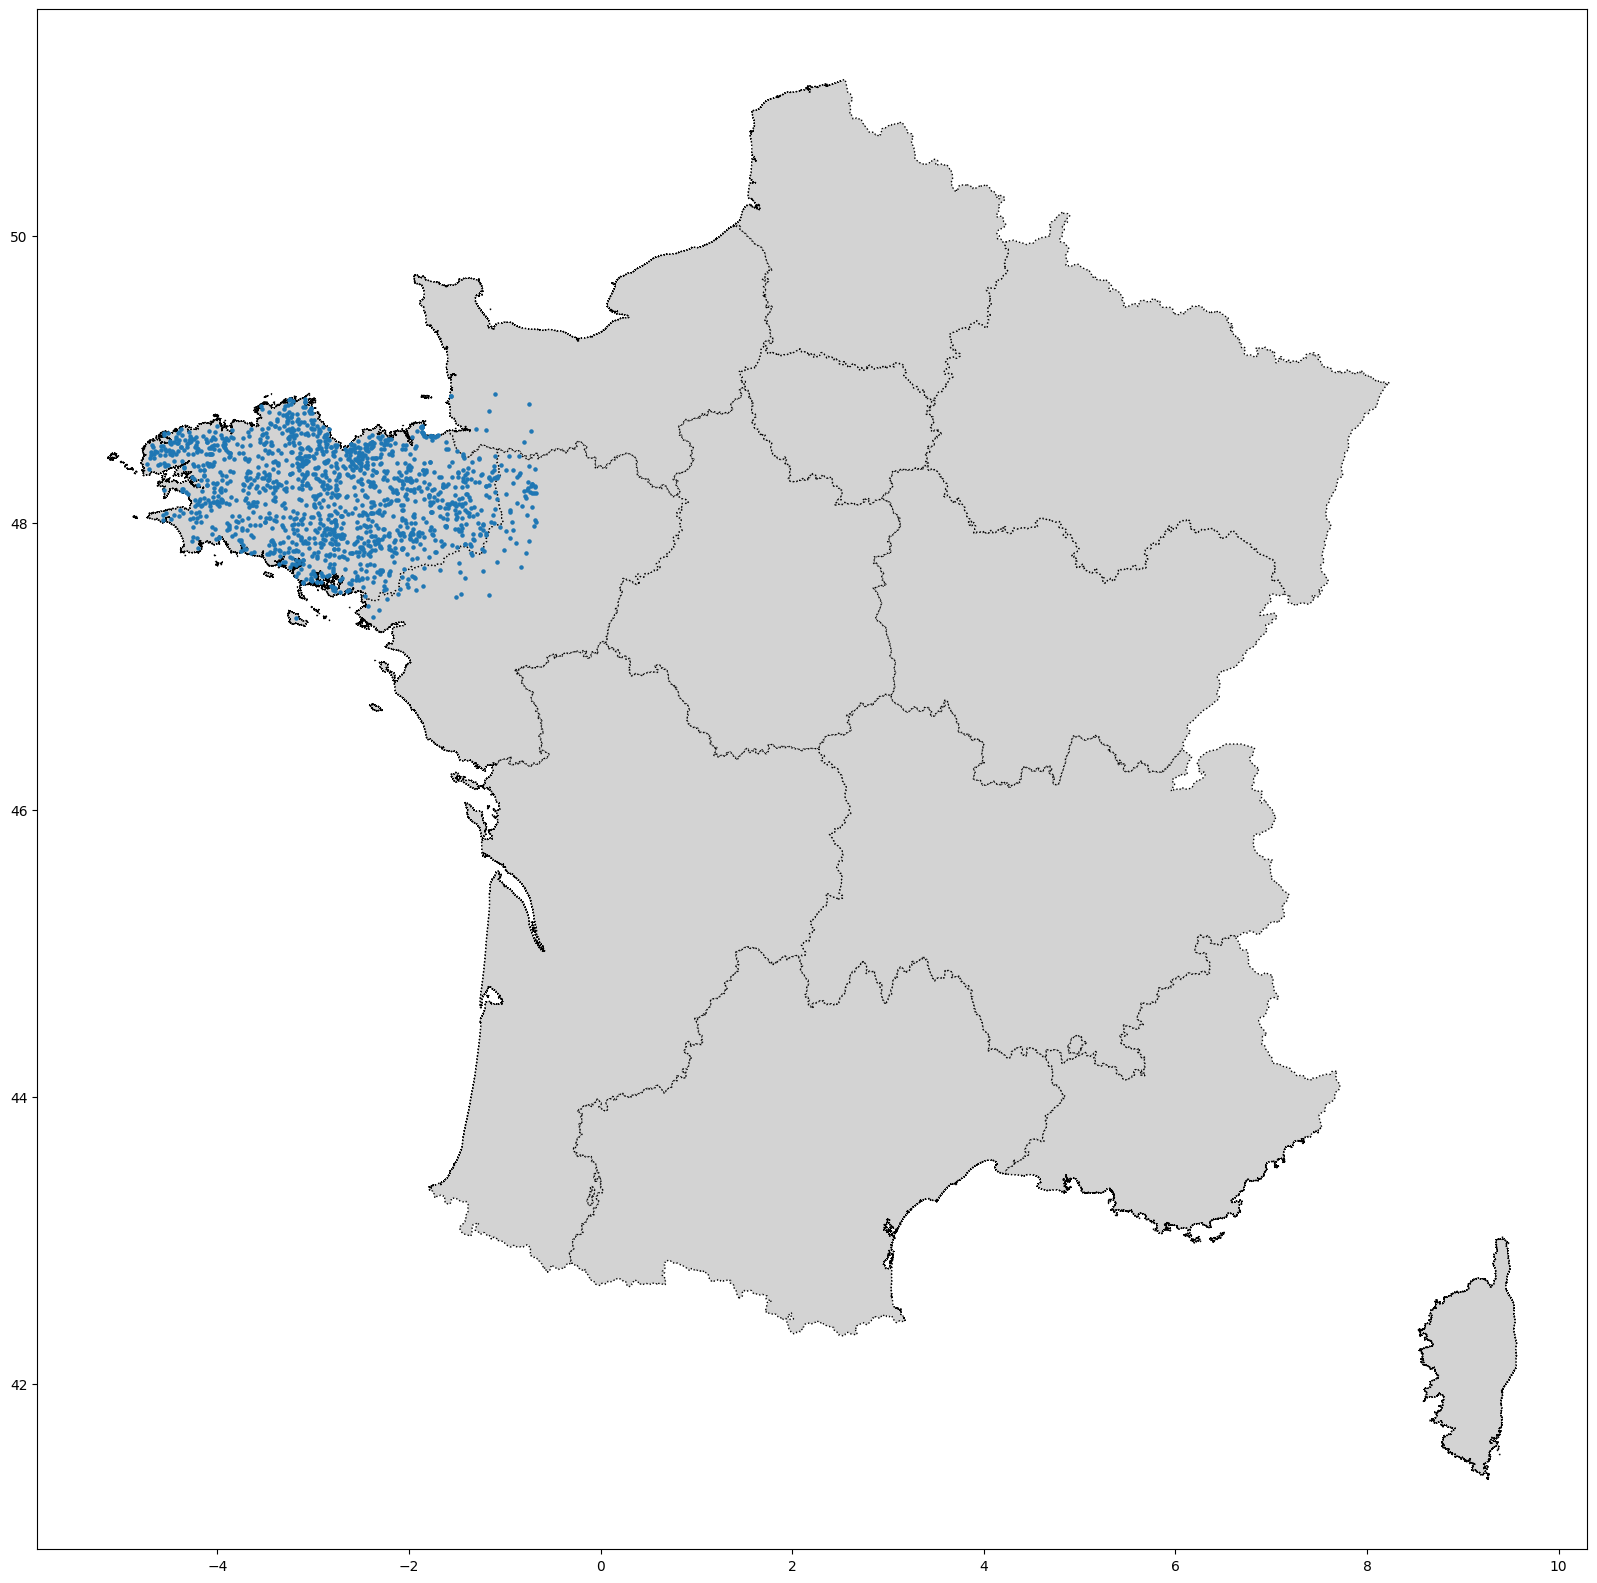

In [59]:
# Load a GeoDataFrame containing regions in France
regions_level1 = gpd.read_file("../france_boundary/gadm36_FRA_1.shp")

# Create the map with both layers
ax = regions_level1.plot(figsize=(20,20), color='lightgrey', linestyle=':', edgecolor='black')
facilities.plot(markersize=5, ax=ax)

In [60]:
regions_level1.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,None,None,Région,Region,None,FR.AR,"POLYGON ((2.22057 44.62204, 2.20748 44.61553, ..."
1,FRA,France,FRA.2_1,Bourgogne-Franche-Comté,None,None,Région,Region,None,FR.BF,"POLYGON ((5.89463 46.28661, 5.88075 46.27185, ..."
2,FRA,France,FRA.3_1,Bretagne,None,None,Région,Region,None,FR.BT,"MULTIPOLYGON (((-2.83514 47.32681, -2.83514 47..."
3,FRA,France,FRA.4_1,Centre-Val de Loire,None,None,Région,Region,None,FR.CN,"POLYGON ((1.12372 46.52232, 1.10414 46.53343, ..."
4,FRA,France,FRA.5_1,Corse,Corsica,None,Région,Region,None,FR.CE,"MULTIPOLYGON (((9.25764 41.34903, 9.25764 41.3..."


In [61]:
# Perform a spatial join to assign each farm to a region
joined_gdf = gpd.sjoin(facilities, regions_level2, how="left", op="within")

# Filter farms by region
farms_in_bretagne = joined_gdf[joined_gdf['NAME_1'] == 'Pays de la Loire']

# Aggregate farms by region and count the number of farms in each region
farms_by_region = farms_in_bretagne.groupby('NAME_1')['name'].count()


/Users/rodrigoazevedo/repos/geopandas/.venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/kj/s6p553_17zxd38q2s490jgr80000gn/T/ipykernel_92319/2161365679.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  joined_gdf = gpd.sjoin(facilities, regions_level2, how="left", op="within")


In [62]:
farms_by_region.head()

NAME_1
Pays de la Loire    74
Name: name, dtype: int64

In [63]:
# Perform a spatial join to assign each farm to a department
joined_gdf2 = gpd.sjoin(facilities, regions_level2, how="left", op="within")



# Aggregate farms by department and count the number of farms in each department
farms_by_department = joined_gdf2.groupby('NAME_2')['name'].count()
farms_by_department.head()
# Select only the desired columns
desired_columns = ['NAME_1', 'NAME_2']
joined_gdf_filtered = joined_gdf[desired_columns]
# Merge the filtered spatial join result with the original facilities DataFrame
joined_gdf_final = facilities.merge(joined_gdf_filtered, left_index=True, right_index=True)

# Filter farms by department
farms_in_Côtes_dArmor = joined_gdf_final[joined_gdf_final['NAME_2'] == "Côtes-d'Armor"]
#Finistère Ille-et-Vilaine    1
#Morbihan
farms_in_Finistère = joined_gdf_final[joined_gdf_final['NAME_2'] == "Finistère"]
farms_in_Ille_et_Vilaine = joined_gdf_final[joined_gdf_final['NAME_2'] == "Ille-et-Vilaine"]
farms_in_Morbihan = joined_gdf_final[joined_gdf_final['NAME_2'] == "Morbihan"]

/Users/rodrigoazevedo/repos/geopandas/.venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/kj/s6p553_17zxd38q2s490jgr80000gn/T/ipykernel_92319/532751814.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  joined_gdf2 = gpd.sjoin(facilities, regions_level2, how="left", op="within")


In [64]:
joined_gdf_final.head()

,name,competitors,website,main_category,categories,phone,address,coordinates,link,latitude,longitude,animal_type,geometry,NAME_1,NAME_2
0,E.Leclerc VANNES,Name: E.Leclerc DRIVE Vannes\nlink: https://ww...,https://e.leclerc/mag/e-leclerc-vannes,dairy,[dairy],+33 2 97 46 60 40,"E.Leclerc VANNES, Zone Commerciale De Parc Lan...","47.6680224,-2.7930742",https://www.google.com/maps/place/E.Leclerc+VA...,47.6680224,-2.7930742,cows,POINT (-2.79307 47.66802),Bretagne,Morbihan
1,E.Leclerc AURAY,Name: Lidl\nlink: https://www.google.com/maps/...,https://e.leclerc/mag/e-leclerc-auray,dairy,[dairy],+33 2 97 24 20 93,"E.Leclerc AURAY, Za de Kerbois, 5 Rue Abraham ...","47.6621336,-3.0070544",https://www.google.com/maps/place/E.Leclerc+AU...,47.6621336,-3.0070544,cows,POINT (-3.00705 47.66213),Bretagne,Morbihan
2,E.Leclerc LANESTER,Name: E.Leclerc Station Service\nlink: https:/...,https://e.leclerc/mag/e-leclerc-lanester,dairy,[dairy],+33 2 97 76 98 76,"E.Leclerc LANESTER, 1 Rue Francois Mauriac, 56...","47.7657459,-3.3490078999999997",https://www.google.com/maps/place/E.Leclerc+LA...,47.7657459,-3.3490078999999997,cows,POINT (-3.34901 47.76575),Bretagne,Morbihan
3,E.Leclerc PLOERMEL,Name: Intermarche SUPER Ploermel\nlink: https:...,https://e.leclerc/mag/e-leclerc-ploermel,dairy,[dairy],+33 2 97 74 23 10,"E.Leclerc PLOERMEL, 13 Rue du Lac, 56800 Ploer...","47.9382321,-2.4057075",https://www.google.com/maps/place/E.Leclerc+PL...,47.9382321,-2.4057075,cows,POINT (-2.40571 47.93823),Bretagne,Morbihan
4,E.Leclerc HENNEBONT CEDEX,Name: E.Leclerc DRIVE Hennebont\nlink: https:/...,https://e.leclerc/mag/e-leclerc-hennebont,dairy,[dairy],+33 2 97 36 26 26,"E.Leclerc HENNEBONT CEDEX, Zone de la Gardelou...","47.798159899999995,-3.2591004999999997",https://www.google.com/maps/place/E.Leclerc+HE...,47.798159899999995,-3.2591004999999997,cows,POINT (-3.25910 47.79816),Bretagne,Morbihan


In [65]:
joined_gdf_final.NAME_1.value_counts()

NAME_1
Bretagne            1427
Pays de la Loire      74
Normandie             10
Name: count, dtype: int64

In [66]:
farms_in_bretagne = joined_gdf_final[joined_gdf_final['NAME_1'] == 'Bretagne']
farms_in_bretagne.NAME_2.value_counts()

NAME_2
Côtes-d'Armor      480
Morbihan           361
Finistère          303
Ille-et-Vilaine    283
Name: count, dtype: int64

In [67]:
farms_in_Côtes_dArmor.head()

,name,competitors,website,main_category,categories,phone,address,coordinates,link,latitude,longitude,animal_type,geometry,NAME_1,NAME_2
16,Ferme Marine Paimpolaise - Bar a Huitres,Name: La Maree du Jour\nlink: https://www.goog...,https://huitrearin.com/,fish_farm,[fish_farm],+33 2 96 20 60 02,"Ferme Marine Paimpolaise - Bar a Huitres, 10 R...","48.7669964,-3.0072357",https://www.google.com/maps/place/Ferme+Marine...,48.7669964,-3.0072357,fish,POINT (-3.00724 48.76700),Bretagne,Côtes-d'Armor
18,La Ferme Des Aubriais,Name: La Ferme de la Paummerais\nlink: https:/...,http://www.ferme-les-aubriais.com/,pig_farm,[pig_farm],+33 2 96 27 19 57,"La Ferme Des Aubriais, Les Aubriais, 22490 Ple...","48.510164499999995,-2.0383136",https://www.google.com/maps/place/La+Ferme+Des...,48.510164499999995,-2.0383136,pigs,POINT (-2.03831 48.51016),Bretagne,Côtes-d'Armor
28,Treg Shellfish and Crustaceans Pleumeur Bodou,Name: Les viviers de Tregastel\nlink: https://...,http://www.pleumeur-bodou.com/TREGOR-COQUILLAG...,fish_farm,[fish_farm],+33 2 96 15 35 17,"Treg Shellfish and Crustaceans Pleumeur Bodou,...","48.8104643,-3.5442904",https://www.google.com/maps/place/Treg+Shellfi...,48.8104643,-3.5442904,fish,POINT (-3.54429 48.81046),Bretagne,Côtes-d'Armor
36,La Ferme de Marie-Jeanne,Name: Ferme de la Mare\nlink: https://www.goog...,http://www.lafermedemariejeanne.fr/,poultry_farm,[poultry_farm],+33 6 87 32 17 44,"La Ferme de Marie-Jeanne, 1 Lourmel, 22400 And...","48.479741999999995,-2.5263169999999997",https://www.google.com/maps/place/La+Ferme+de+...,48.479741999999995,-2.5263169999999997,poultry,POINT (-2.52632 48.47974),Bretagne,Côtes-d'Armor
38,La Ferme de la Paummerais,Name: La Ferme Des Aubriais\nlink: https://www...,http://fermedelapaumerais.fr/,poultry_farm,[poultry_farm],+33 7 87 21 02 34,"La Ferme de la Paummerais, Le Bois Seigneur, 2...","48.5133635,-2.0751339",https://www.google.com/maps/place/La+Ferme+de+...,48.5133635,-2.0751339,poultry,POINT (-2.07513 48.51336),Bretagne,Côtes-d'Armor


In [68]:
farms_in_Côtes_dArmor.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 480 entries, 16 to 1512
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           480 non-null    object  
 1   competitors    455 non-null    object  
 2   website        47 non-null     object  
 3   main_category  480 non-null    object  
 4   categories     480 non-null    object  
 5   phone          325 non-null    object  
 6   address        479 non-null    object  
 7   coordinates    480 non-null    object  
 8   link           480 non-null    object  
 9   latitude       480 non-null    object  
 10  longitude      480 non-null    object  
 11  animal_type    480 non-null    object  
 12  geometry       480 non-null    geometry
 13  NAME_1         480 non-null    object  
 14  NAME_2         480 non-null    object  
dtypes: geometry(1), object(14)
memory usage: 60.0+ KB


<Axes: >

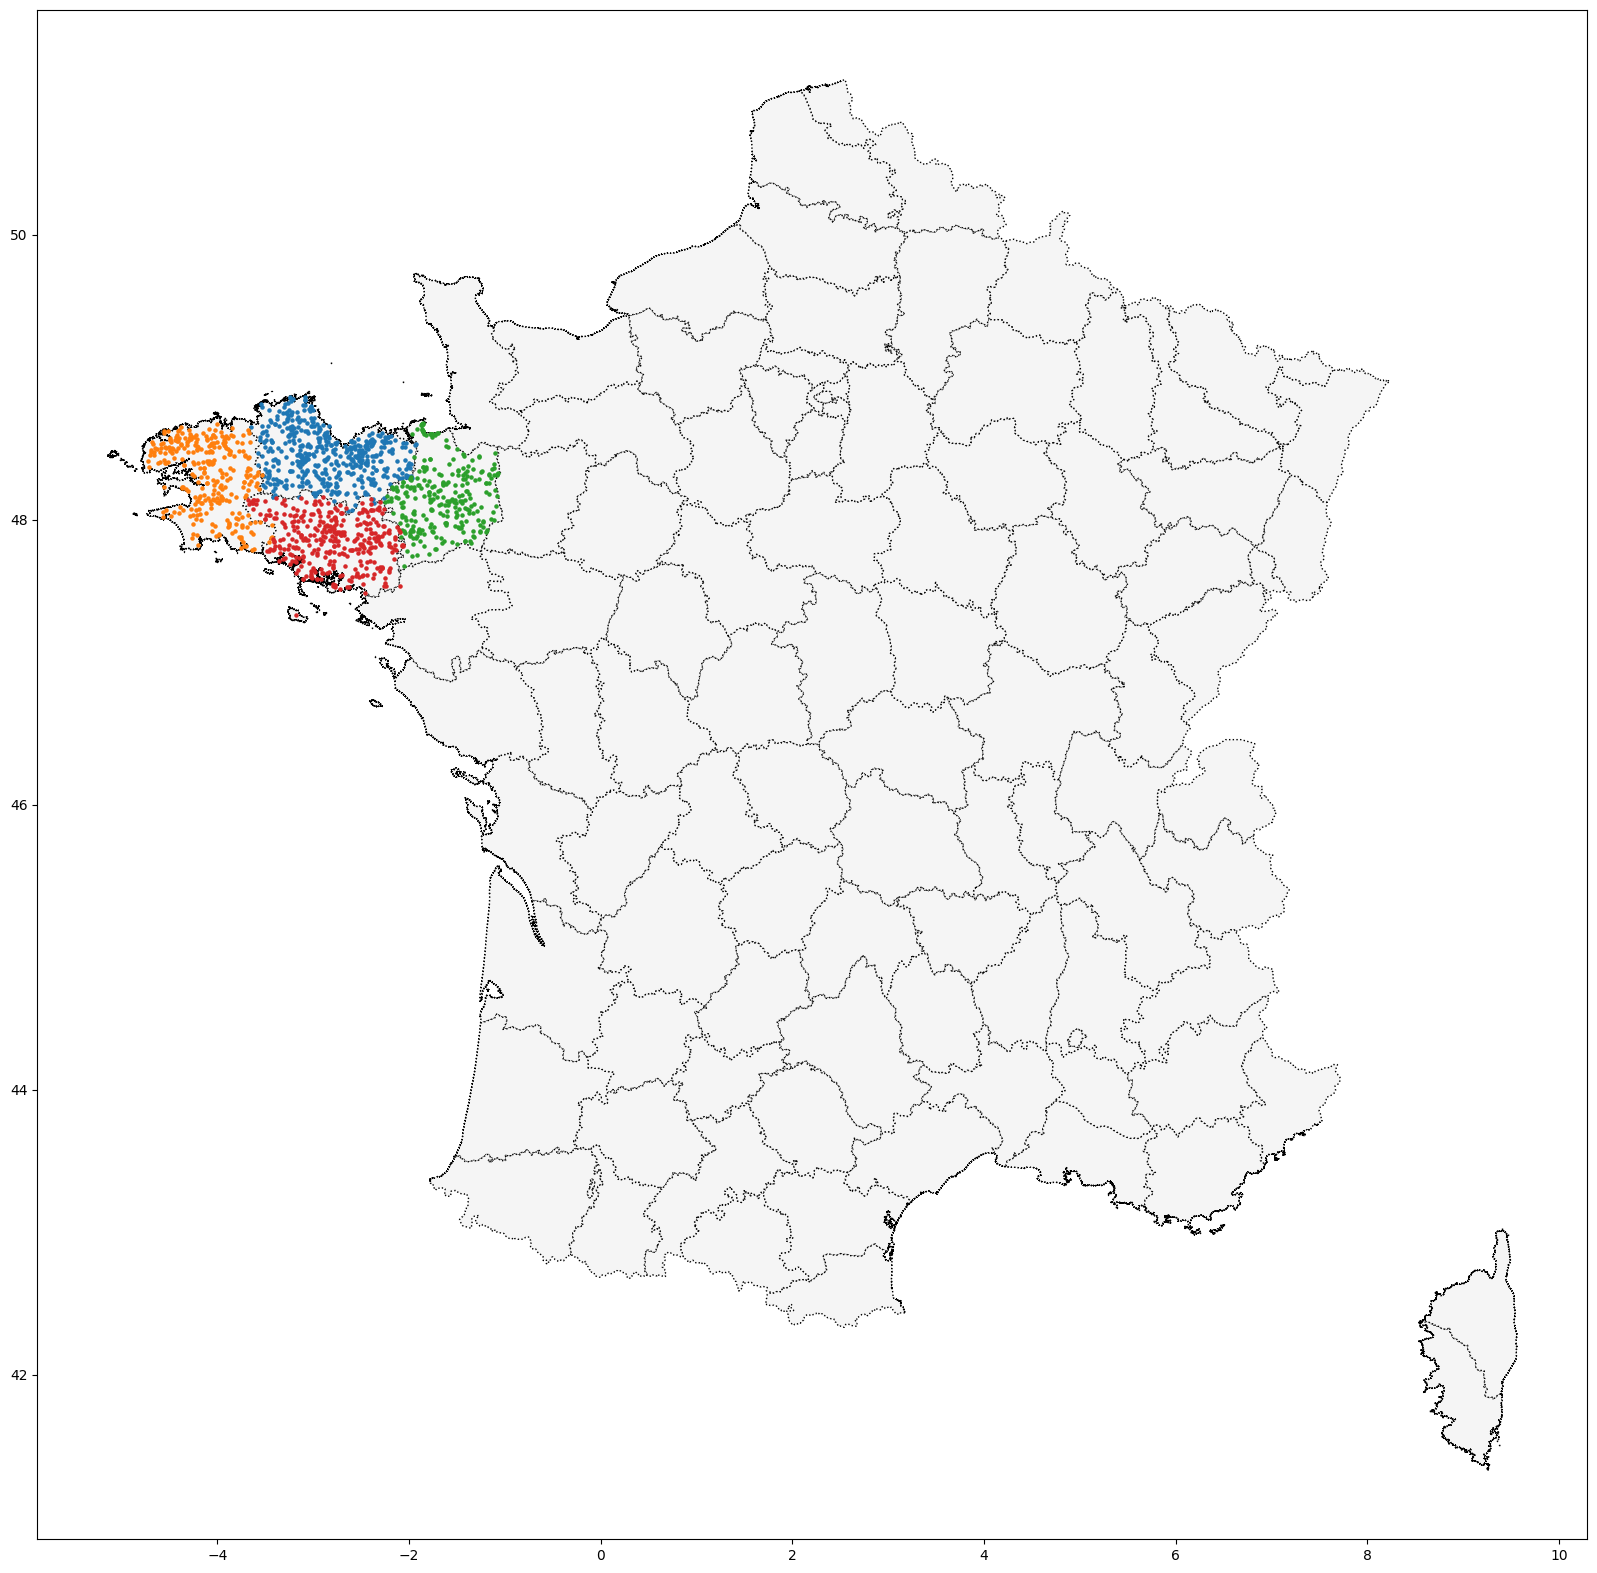

In [69]:
# Create a map
ax = regions_level2.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black')
farms_in_Côtes_dArmor.plot(markersize=5, ax=ax)
farms_in_Finistère.plot(markersize=5, ax=ax)
farms_in_Ille_et_Vilaine.plot(markersize=5, ax=ax)
farms_in_Morbihan.plot(markersize=5, ax=ax)

<Axes: >

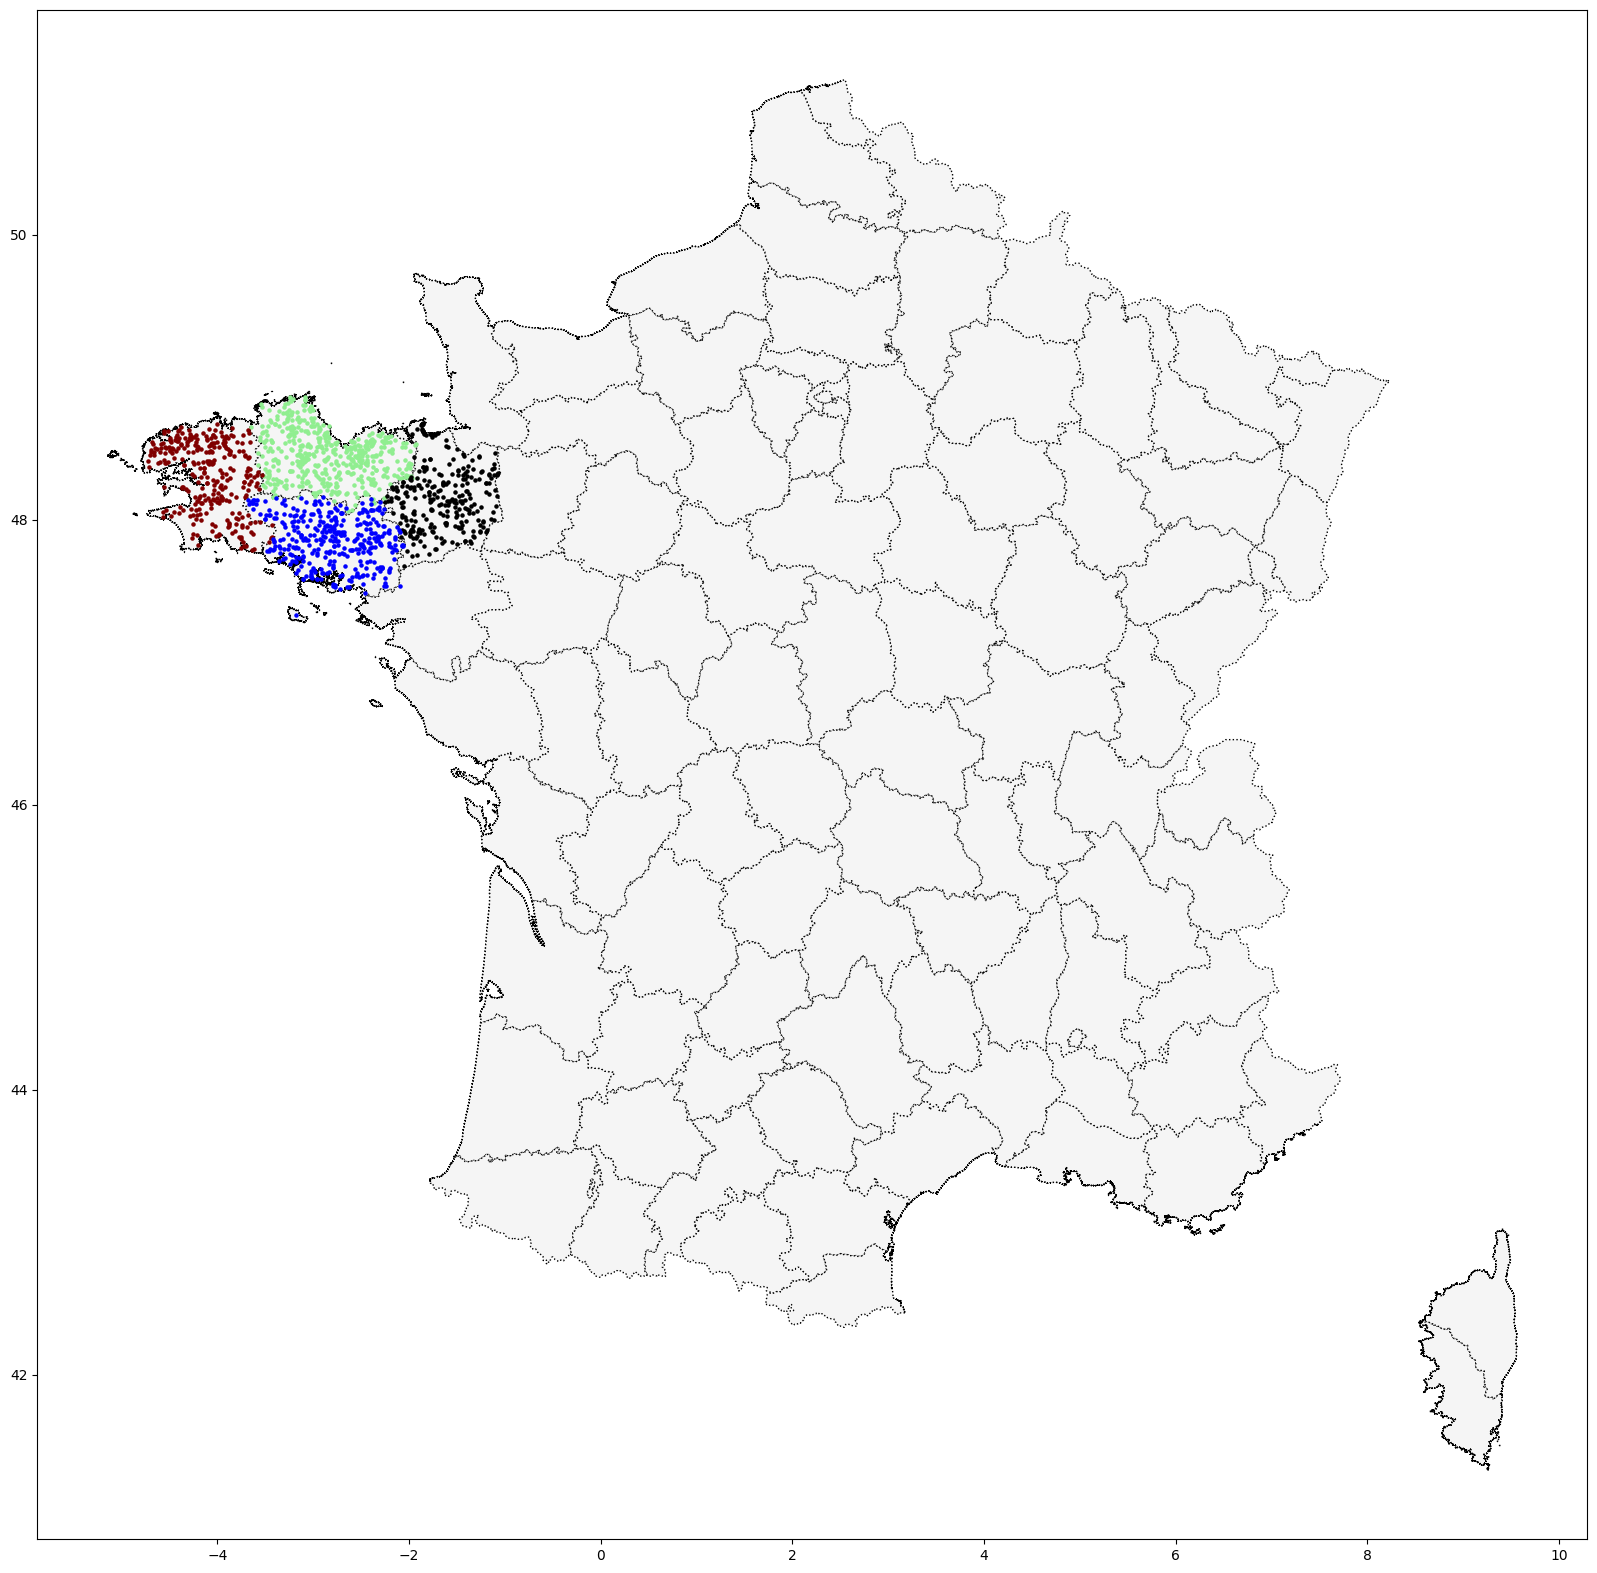

In [70]:

# Create a map
ax = regions_level2.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black', zorder=1)

# Plot farms in each region with assigned colors
farms_in_Côtes_dArmor.plot(color='lightgreen', markersize=5, ax=ax, zorder=2)
farms_in_Finistère.plot(color='maroon', markersize=5, ax=ax, zorder=2)
farms_in_Ille_et_Vilaine.plot(color='black', markersize=5, ax=ax, zorder=2)
farms_in_Morbihan.plot(color='blue', markersize=5, ax=ax, zorder=2)

<Axes: >

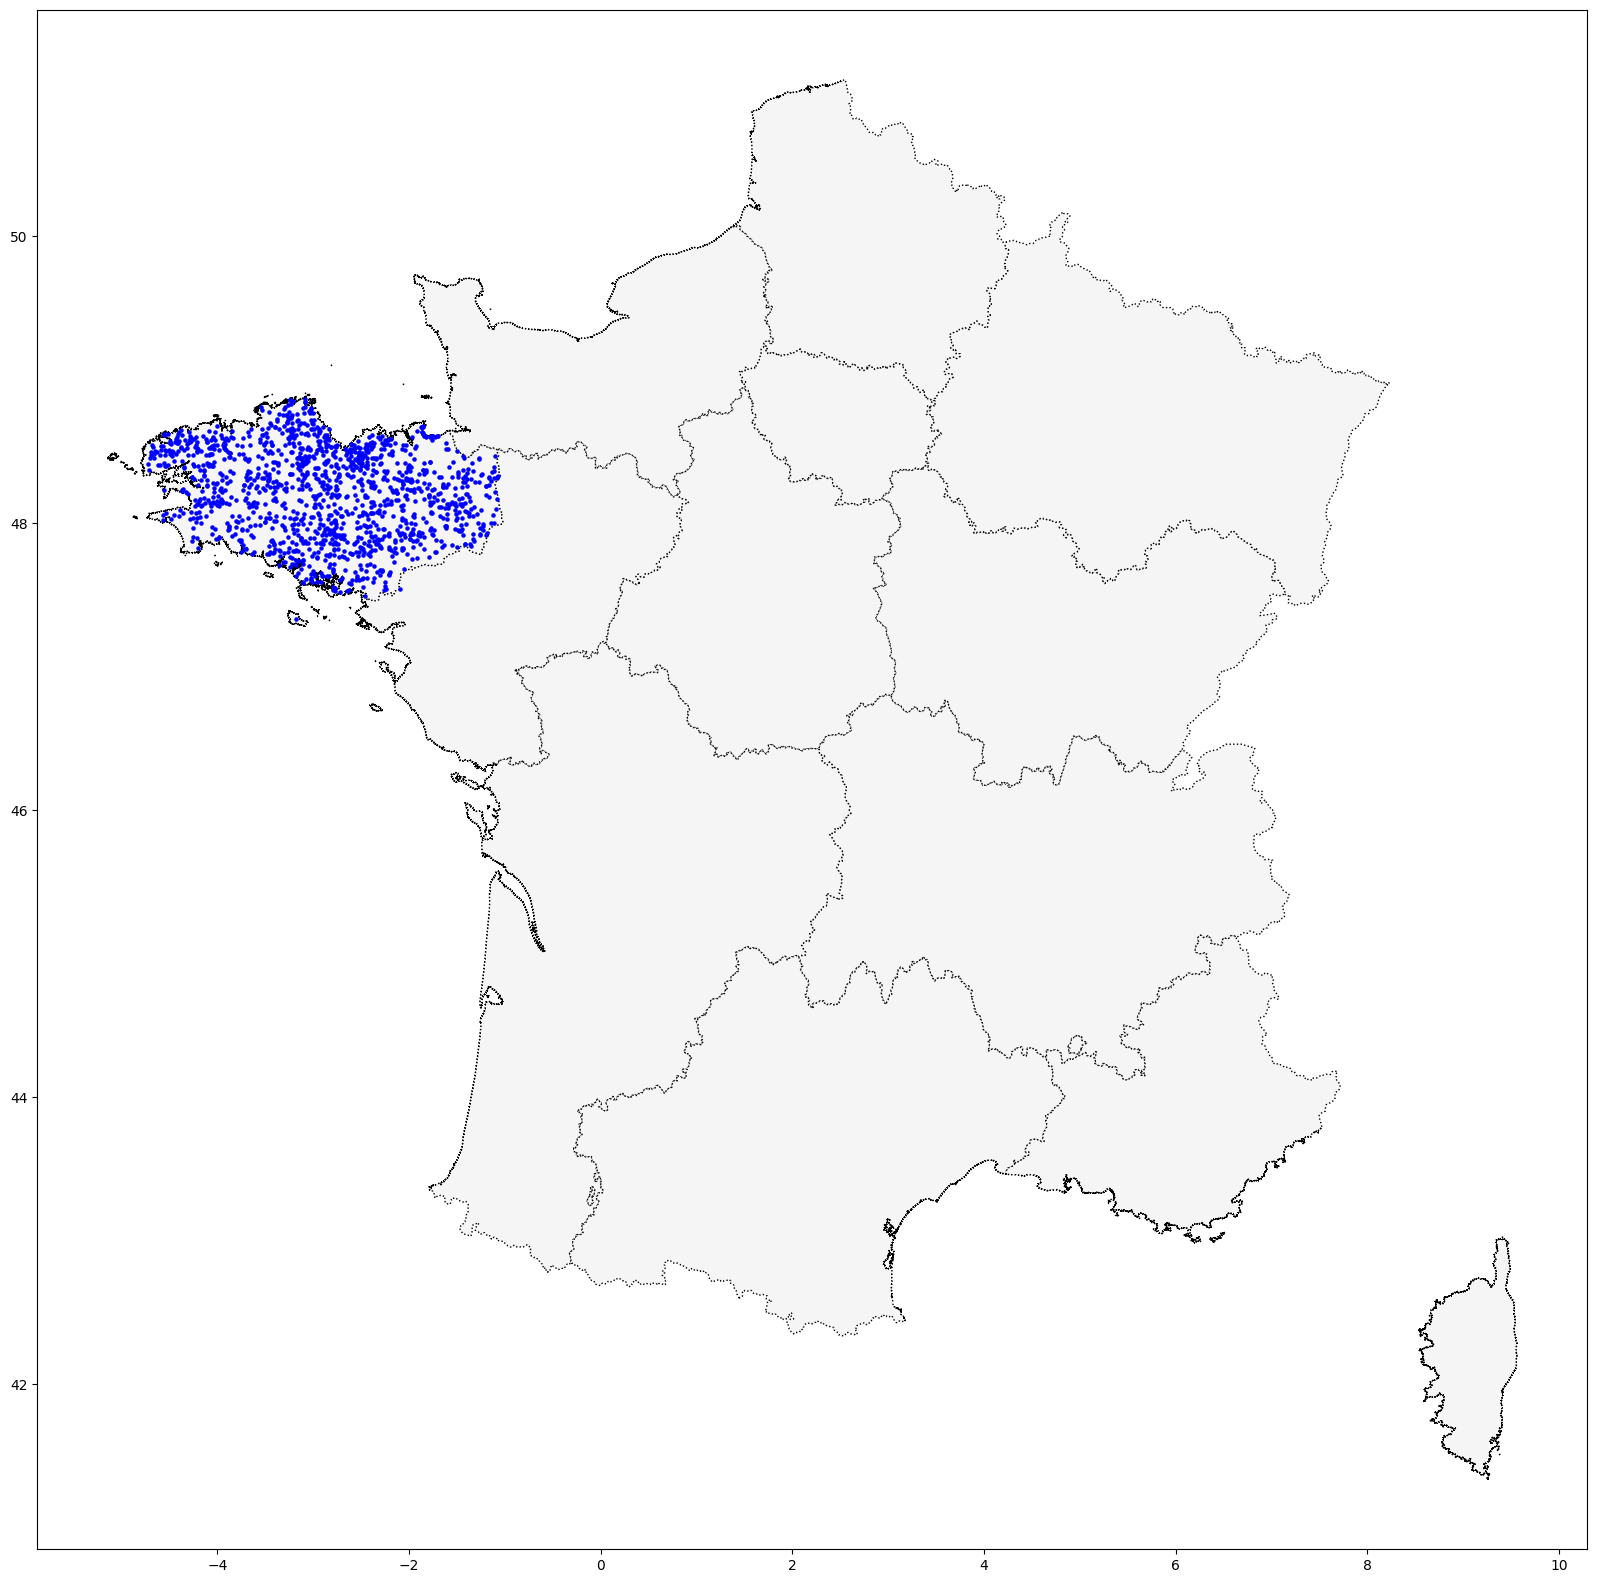

In [71]:
farms_in_bretagne 

# Create a map
ax = regions_level1.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black', zorder=1)

# Plot farms in each region with assigned colors
farms_in_bretagne.plot(color='blue', markersize=5, ax=ax, zorder=2)

0     Annotation(4.54529, 45.5179, 'Auvergne-Rhône-A...
1     Annotation(4.80692, 47.2342, 'Bourgogne-Franch...
2              Annotation(-2.84511, 48.179, 'Bretagne')
3     Annotation(1.68439, 47.4848, 'Centre-Val de Lo...
4                 Annotation(9.10559, 42.1515, 'Corse')
5             Annotation(5.61328, 48.6887, 'Grand Est')
6       Annotation(2.77043, 49.9697, 'Hauts-de-France')
7         Annotation(2.50347, 48.7092, 'Île-de-France')
8            Annotation(0.108212, 49.1199, 'Normandie')
9     Annotation(0.212187, 45.2059, 'Nouvelle-Aquita...
10            Annotation(2.14237, 43.7032, 'Occitanie')
11    Annotation(-0.815496, 47.4777, 'Pays de la Loi...
12    Annotation(6.05871, 43.9575, "Provence-Alpes-C...
dtype: object

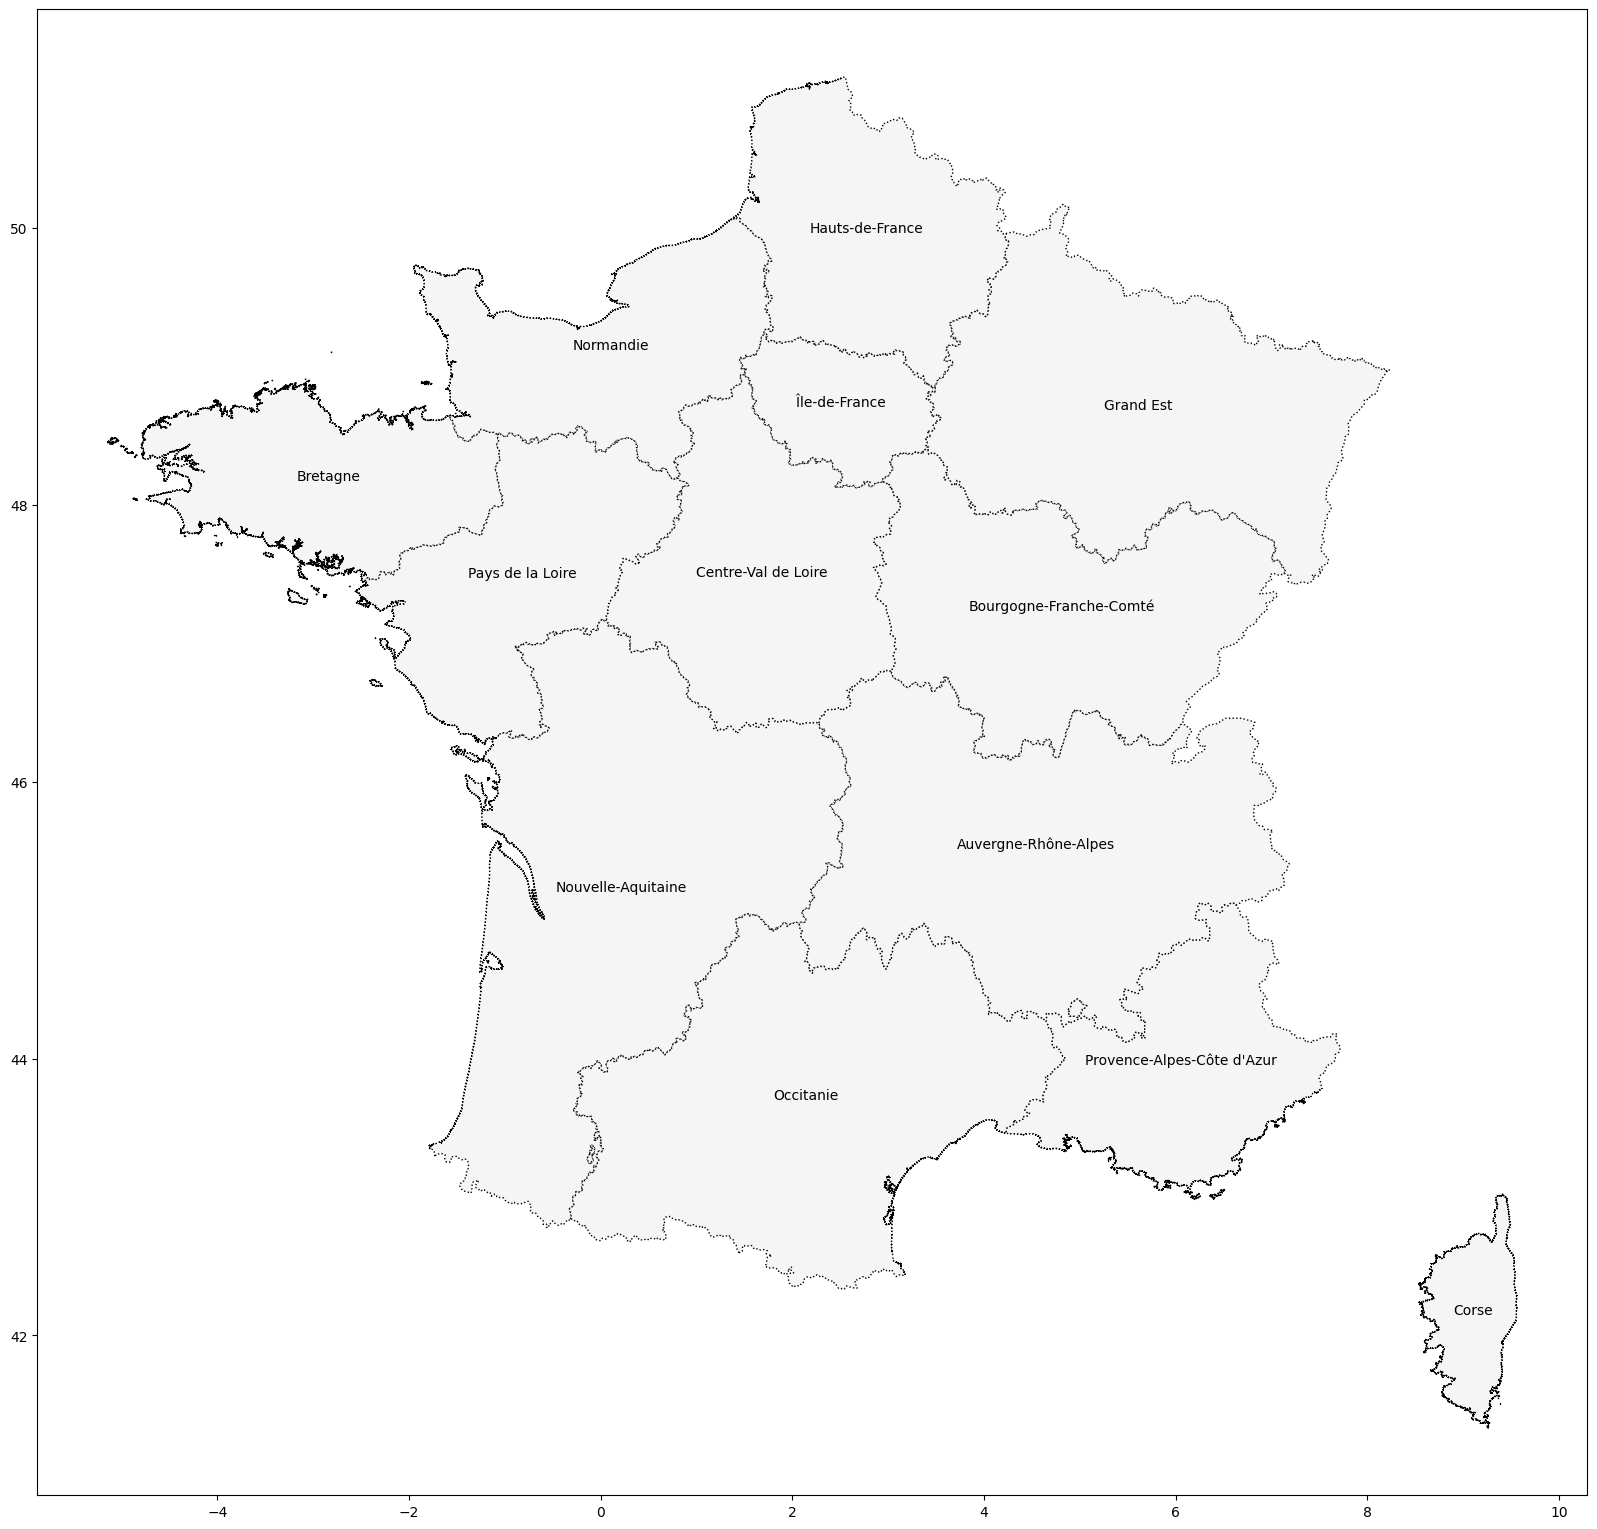

In [73]:
# create a map with the names of the regions
ax = regions_level1.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black', zorder=1)
regions_level1.apply(lambda x: ax.annotate(text=x.NAME_1, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

